In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

## **1. Data Exploration**

Explore the dataset to understand the distribution of features and the prevalence of fraud indicators.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Memanggil data
df = pd.read_csv('/content/drive/MyDrive/FastTagFraudDetection-dataset/FastagFraudDetection.csv')

In [ ]:
# Display the first few rows of the dataset
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
# Summary statistics of the dataset
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
# Checking for missing values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

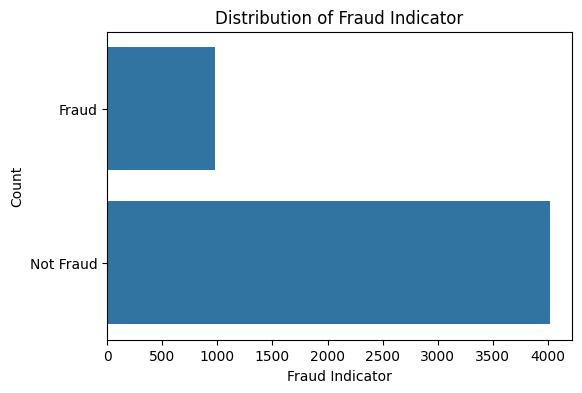

In [ ]:
# Distribution of the target variable (fraud indicator)
plt.figure(figsize=(6, 4))
sns.countplot(df['Fraud_indicator'])
plt.title('Distribution of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

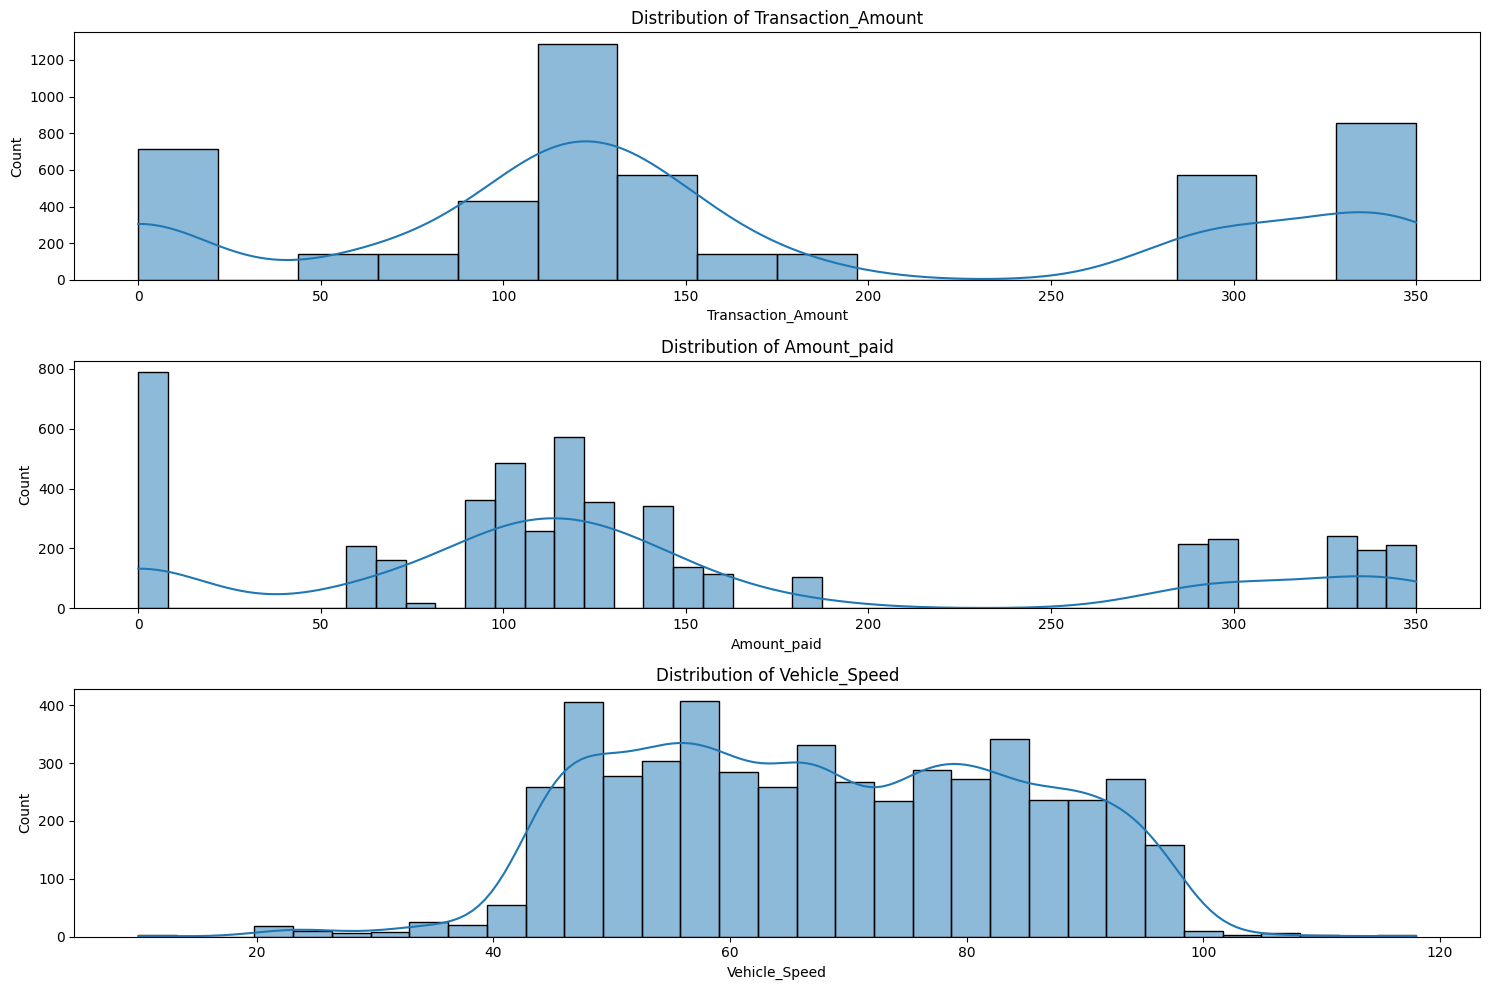

In [ ]:
# Distribution of numerical features
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 1, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

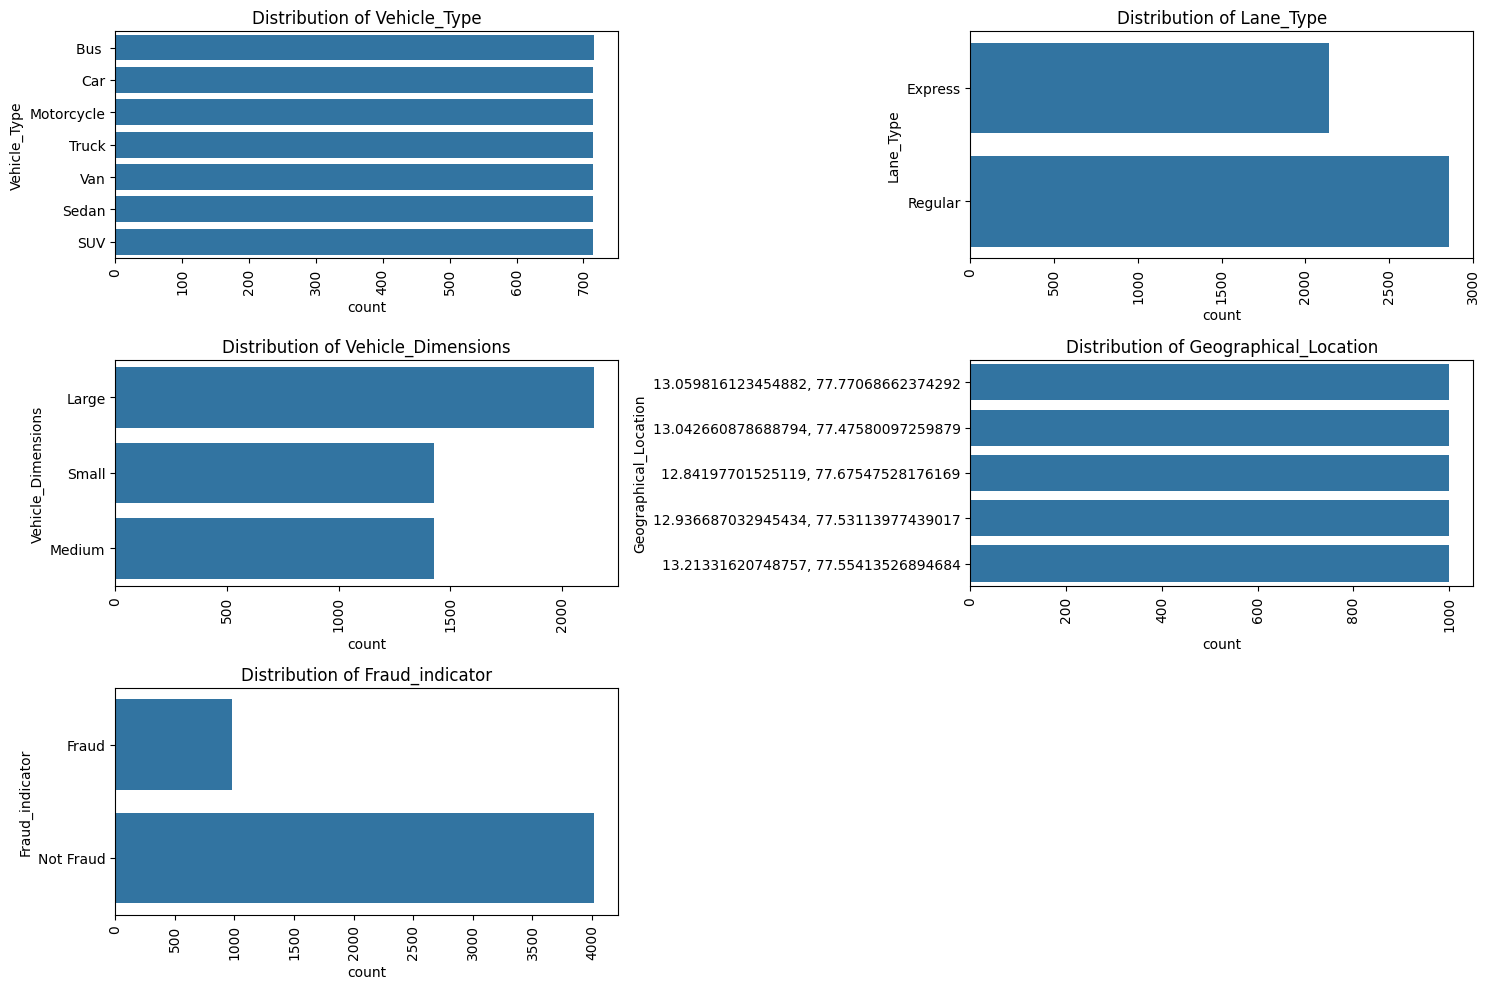

In [ ]:
# Distribution of categorical features
categorical_features = ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions',
                        'Geographical_Location', 'Fraud_indicator']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **2. Feature Engineering**


Identify and engineer relevant features that contribute to fraud detection accuracy

In [ ]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
# Extract new features from Timestamp
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday

In [ ]:
# Drop original Timestamp column
df.drop('Timestamp', axis=1, inplace=True)

In [ ]:
# Handling missing values in FastagID
df['FastagID'].fillna('missing', inplace=True)

In [ ]:
# Calculate difference between Transaction_Amount and Amount_paid
df['Amount_Difference'] = df['Transaction_Amount'] - df['Amount_paid']


In [ ]:
# Encode categorical variables
categorical_features = ['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type',
                        'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator']

In [ ]:
# Label Encoding for binary classification target
label_encoder = LabelEncoder()
df['Fraud_indicator'] = label_encoder.fit_transform(df['Fraud_indicator'])

In [ ]:
# Apply one-hot encoding to other categorical features
df = pd.get_dummies(df, columns=categorical_features[:-1])

In [ ]:
# Normalize/Scale numerical features
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed',
                      'Hour', 'Day', 'Month', 'Weekday', 'Amount_Difference']

In [ ]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
print("Processed dataset:")
df.head()

Processed dataset:


,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Hour,Day,Month,Weekday,Amount_Difference,...,Vehicle_Plate_Number_WB34OP7890,Vehicle_Plate_Number_WB34QR1234,Vehicle_Plate_Number_WB34ST5678,Vehicle_Plate_Number_WB34UV5678,Vehicle_Plate_Number_WB34UV9012,Vehicle_Plate_Number_WB34WX1234,Vehicle_Plate_Number_WB34WX4567,Vehicle_Plate_Number_WB34WX7890,Vehicle_Plate_Number_WB34YZ3456,Vehicle_Plate_Number_WB34YZ6789
0,1,1.680364,-0.199689,-0.171802,0,-0.081094,-1.110868,-1.423271,0.490577,3.747401,...,False,False,False,False,False,False,False,False,False,False
1,2,-0.365195,-0.387535,0.611525,0,0.358998,-0.997005,-1.423271,0.987011,0.003548,...,False,False,False,False,False,False,False,False,False,False
2,3,-1.432443,-1.326764,-0.894872,1,0.945789,-0.883142,-1.423271,1.483446,-0.353010,...,False,False,False,False,False,False,False,False,False,False
3,4,1.680364,-0.199689,1.455108,0,-1.401373,-0.769280,-1.423271,-1.495162,3.747401,...,False,False,False,False,False,False,False,False,False,False
4,5,-0.187320,-0.387535,-0.473081,0,-0.814582,-0.655417,-1.423271,-0.998727,0.360105,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Save the processed dataset
df.to_csv('processed_fast_tag_fraud_detection.csv', index=False)

## **3. Model Development**


- Build a machine learning classification model to predict and detect Fastag transaction fraud.
- Evaluate and fine-tune model performance using appropriate metrics.

In [ ]:
# Separate features and target variable
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Performance:
Accuracy: 0.9930
Precision: 0.9911
Recall: 1.0000
F1 Score: 0.9955


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       217
           1       0.99      1.00      1.00       783

    accuracy                           0.99      1000
   macro avg       1.00      0.98      0.99      1000
weighted avg       0.99      0.99      0.99      1000



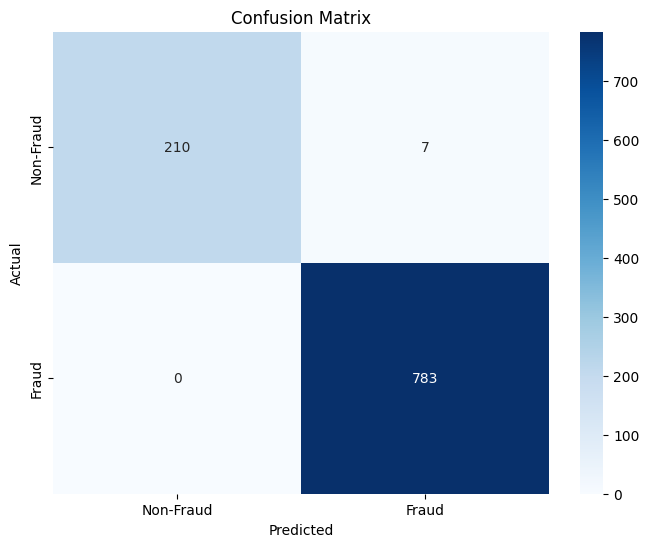

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Fine-tuning the model using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [ ]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("\nBest parameters found by GridSearchCV:")
print(best_params)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print("\nTuned Model Performance:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")


Best parameters found by GridSearchCV:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Tuned Model Performance:
Accuracy: 0.8920
Precision: 0.8788
Recall: 1.0000
F1 Score: 0.9355


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67       217
           1       0.88      1.00      0.94       783

    accuracy                           0.89      1000
   macro avg       0.94      0.75      0.80      1000
weighted avg       0.91      0.89      0.88      1000



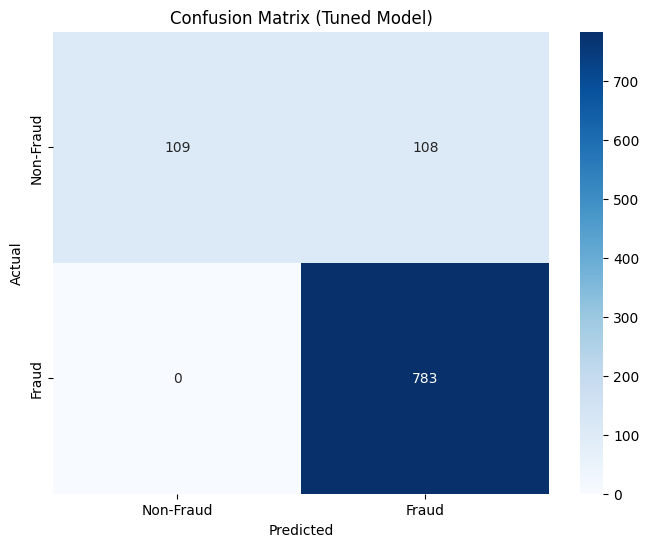

In [ ]:
# Plot the confusion matrix for the tuned model
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

## **4. Real-time Fraud Detection**

Explore the feasibility of implementing the model for real-time Fastag fraud detection.

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'random_forest_fraud_model.pkl')


['random_forest_fraud_model.pkl']

In [ ]:
#Use Flask or FastAPI to create an API endpoint for the model.

from flask import Flask, request, jsonify
import joblib

# Load the model
model = joblib.load('random_forest_fraud_model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    # Preprocess data as done during training
    # Assuming 'data' is already in the correct format
    prediction = model.predict(data)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)

## **5. Explanatory Analysis**

Provide insights into the factors contributing to fraudulent transactions.

In [ ]:
#Feature Importance

importances = best_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                              Feature  Importance
8                   Amount_Difference    0.320456
2                         Amount_paid    0.140584
1                  Transaction_Amount    0.025882
0                      Transaction_ID    0.024922
11            Vehicle_Type_Motorcycle    0.019789
...                               ...         ...
4440         FastagID_FTG-987-HGT-104    0.000000
4438         FastagID_FTG-986-PLM-432    0.000000
4435         FastagID_FTG-985-WXY-678    0.000000
4433         FastagID_FTG-984-POU-098    0.000000
9483  Vehicle_Plate_Number_WB34YZ6789    0.000000

[9484 rows x 2 columns]
